First dataset is the Shots Fired data set from https://data.boston.gov/dataset/shots-fired. It represents occurrences of ballistic evidence within different districts.

Second dataset is the Boston Park Assets data set from https://data.boston.gov/dataset/boston-park-assets/resource/56b3003f-f397-43a1-9321-cd46b4ad9097. It represents each park and its location.

I will be checking if there is any correlation between the number of parks in an area and the counts of ballistic evidence within that area to see if parks can increase or decrease the number of shootings.


In [2]:
import pandas as pd

# Read in tmpvyq0sbvq.csv and display the head
df1 = pd.read_csv('/Users/tarekmourad/Desktop/GunViolence2/tmpvyq0sbvq.csv')
display(df1.head())

# Read in tmp_97z79tt.csv and display the head
df2 = pd.read_csv('/Users/tarekmourad/Desktop/GunViolence2/tmp_97z79tt.csv')
display(df2.head())

,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01 04:17:00+00,C11,f
1,I152000042-00,2015-01-01 00:05:00+00,A15,f
2,I152000514-00,2015-01-02 15:51:00+00,B3,t
3,I152000965-00,2015-01-04 15:30:00+00,B2,t
4,I152000872-00,2015-01-04 00:13:00+00,B2,f


,Park,Location,Feature(s)
0,Adams/King Playground,Dorchester,"Playground, Street Hockey"
1,Amatucci Playground,Hyde Park,"Playground, Basketball"
2,American Legion Playground,East Boston,"Playground, Basketball, Players Bench, Soccer"
3,A Street Park,South Boston,"Playground, Dog Park"
4,Back Bay Fens,Fenway/Longwood,"Playground, Basketball, Players Bench"


In [3]:
t_ballistic_evid_df1 = df1[df1['ballistics_evidence'] == 't']

# Display the filtered DataFrame
display(t_ballistic_evid_df1.head())

f_ballistic_evid_df1 = df1[df1['ballistics_evidence'] == 'f']

# Display the filtered DataFrame
display(f_ballistic_evid_df1.head())


,incident_num,incident_date,district,ballistics_evidence
2,I152000514-00,2015-01-02 15:51:00+00,B3,t
3,I152000965-00,2015-01-04 15:30:00+00,B2,t
8,I152001625-00,2015-01-06 19:39:00+00,B3,t
9,I152001947-00,2015-01-08 12:30:00+00,B3,t
11,I152002410-00,2015-01-09 17:59:00+00,C11,t


,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01 04:17:00+00,C11,f
1,I152000042-00,2015-01-01 00:05:00+00,A15,f
4,I152000872-00,2015-01-04 00:13:00+00,B2,f
5,I152000856-00,2015-01-03 23:57:00+00,B2,f
6,I152000600-00,2015-01-02 22:25:00+00,E13,f


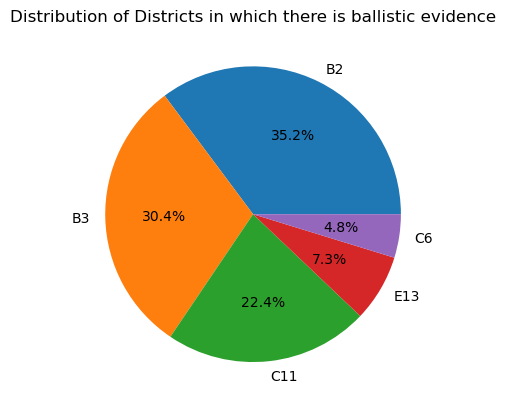

In [4]:
import matplotlib.pyplot as plt

# Get the counts of each district
district_counts = t_ballistic_evid_df1['district'].value_counts()

# Get the top 5 districts
top_districts = district_counts[:5]

# Create a pie chart
plt.pie(top_districts.values, labels=top_districts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Districts in which there is ballistic evidence')

# Show the plot
plt.show()

In [5]:
unique_locations = df2['Location'].unique()
print(unique_locations)

['Dorchester' 'Hyde Park' 'East Boston' 'South Boston' 'Fenway/Longwood'
 'Roxbury' 'West Roxbury' 'Back Bay/Beacon Hill' 'Jamaica Plain'
 'Charlestown' 'Allston-Brighton' 'Central Boston' 'Mattapan' 'Roslindale'
 'Mission Hill' 'South End']


In [6]:
import pandas as pd

data = {'Location': ['Dorchester', 'Hyde Park', 'East Boston', 'South Boston', 'Fenway/Longwood', 'Roxbury', 'West Roxbury', 'Back Bay/Beacon Hill', 'Jamaica Plain', 'Charlestown', 'Allston-Brighton', 'Central Boston', 'Mattapan', 'Roslindale', 'Mission Hill', 'South End'],
        'zip_code': ['02121, 02122, 02124, 02125', '02136', '02128', '02127', '02115, 02215', '02119', '02132', '02116', '02130', '02808, 02813, 02129', '02134, 02135', '02118', '02126', '02131', '02120, 02130', '02118']}

zipcodes_df = pd.DataFrame(data)

# Replace all instances of 'Central Boston' with 'South End'
zipcodes_df['Location'] = zipcodes_df['Location'].replace('Central Boston', 'South End')

# Group the zipcodes_df dataframe by 'Location' and aggregate the zip codes into a list
grouped_df = zipcodes_df.groupby('Location')['zip_code'].agg(list).reset_index()

# Display the resulting dataframe
print(grouped_df)



                Location                      zip_code
0       Allston-Brighton                [02134, 02135]
1   Back Bay/Beacon Hill                       [02116]
2            Charlestown         [02808, 02813, 02129]
3             Dorchester  [02121, 02122, 02124, 02125]
4            East Boston                       [02128]
5        Fenway/Longwood                [02115, 02215]
6              Hyde Park                       [02136]
7          Jamaica Plain                       [02130]
8               Mattapan                       [02126]
9           Mission Hill                [02120, 02130]
10            Roslindale                       [02131]
11               Roxbury                       [02119]
12          South Boston                       [02127]
13             South End                [02118, 02118]
14          West Roxbury                       [02132]


In [7]:
# Merge the two dataframes on the 'Location' column
merged_df2 = pd.merge(df2, grouped_df, on='Location', how='left')

# Display the merged dataframe
display(merged_df2.head())

,Park,Location,Feature(s),zip_code
0,Adams/King Playground,Dorchester,"Playground, Street Hockey","[02121, 02122, 02124, 02125]"
1,Amatucci Playground,Hyde Park,"Playground, Basketball",[02136]
2,American Legion Playground,East Boston,"Playground, Basketball, Players Bench, Soccer",[02128]
3,A Street Park,South Boston,"Playground, Dog Park",[02127]
4,Back Bay Fens,Fenway/Longwood,"Playground, Basketball, Players Bench","[02115, 02215]"


In [8]:
unique_districts = df1['district'].unique()
print(unique_districts)

['C11' 'A15' 'B3' 'B2' 'E13' 'C6' 'A1' 'A7' 'E18' 'D4' 'E5' nan 'D14']


In [9]:
zip_codes = {
    'C11': ['02121', '02122', '02124', '02125'],
    'A15': ['02129', '02808', '02813'],
    'B3': ['02126'],
    'B2': ['02119'],
    'E13': ['02130'],
    'C6': ['02127'],
    'A1': ['02114', '02108'],
    'A7': ['02128'],
    'E18': ['02136'],
    'D4': ['02118'],
    'E5': ['02132'],
    'D14': ['02134', '02135']
}

df1['zip_code'] = df1['district'].map(zip_codes)
display(df1.head())
display(merged_df2.head())

,incident_num,incident_date,district,ballistics_evidence,zip_code
0,I152000093-00,2015-01-01 04:17:00+00,C11,f,"[02121, 02122, 02124, 02125]"
1,I152000042-00,2015-01-01 00:05:00+00,A15,f,"[02129, 02808, 02813]"
2,I152000514-00,2015-01-02 15:51:00+00,B3,t,[02126]
3,I152000965-00,2015-01-04 15:30:00+00,B2,t,[02119]
4,I152000872-00,2015-01-04 00:13:00+00,B2,f,[02119]


,Park,Location,Feature(s),zip_code
0,Adams/King Playground,Dorchester,"Playground, Street Hockey","[02121, 02122, 02124, 02125]"
1,Amatucci Playground,Hyde Park,"Playground, Basketball",[02136]
2,American Legion Playground,East Boston,"Playground, Basketball, Players Bench, Soccer",[02128]
3,A Street Park,South Boston,"Playground, Dog Park",[02127]
4,Back Bay Fens,Fenway/Longwood,"Playground, Basketball, Players Bench","[02115, 02215]"


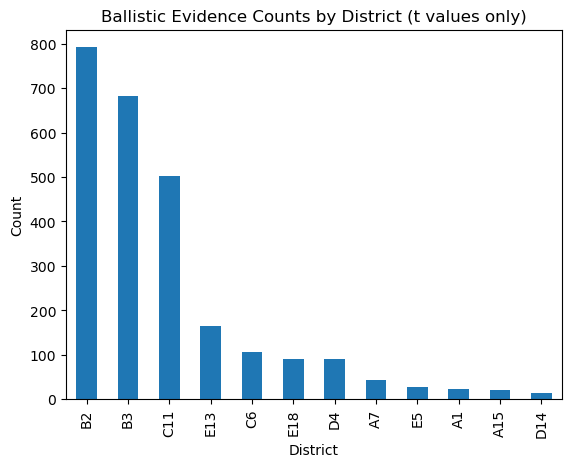

In [10]:
import matplotlib.pyplot as plt

# Filter the data to only include rows with 't' values in 'ballistics_evidence'
df1_t = df1[df1['ballistics_evidence'] == 't']

# Group the filtered data by district and count the 't' values
counts = df1_t.groupby('district')['ballistics_evidence'].count()

counts = counts.sort_values(ascending=False)


# Create a bar chart of the counts
counts.plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Ballistic Evidence Counts by District (t values only)')
plt.show()

78343


,incident_num,incident_date,district,ballistics_evidence,zip_code,Park,Location,Feature(s)
0,I152000514-00,2015-01-02 15:51:00+00,B3,t,['02126'],Ernst Chery Jr. Playground,Mattapan,"Spray Play, Playground"
1,I152000514-00,2015-01-02 15:51:00+00,B3,t,['02126'],Harambee Park,Mattapan,"Bench, Basketball, Playground, Spray Play, Pla..."
2,I152000514-00,2015-01-02 15:51:00+00,B3,t,['02126'],Hunt Playground,Mattapan,"Tennis, Playground, Spray Play, Basketball, Mu..."
3,I152000514-00,2015-01-02 15:51:00+00,B3,t,['02126'],Walker Playground,Mattapan,"Basketball, Spray Play, Playground, Players Be..."
4,I152000514-00,2015-01-02 15:51:00+00,B3,t,['02126'],Walsh Playground,Mattapan,"Playground, Players Bench, Basketball, Tennis"


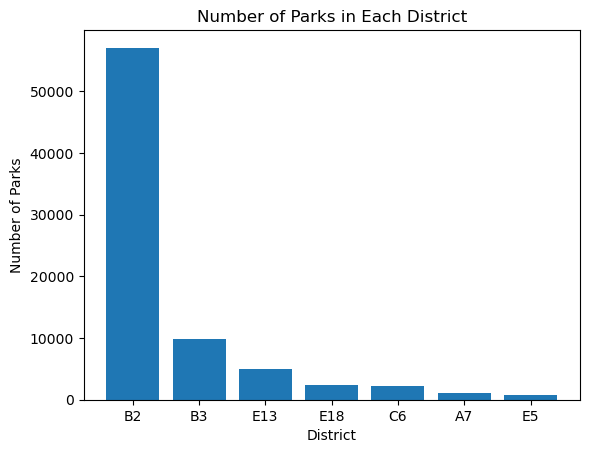

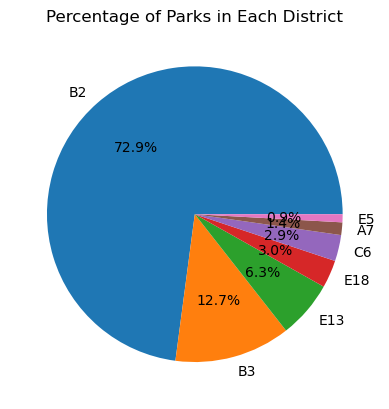

In [15]:
import pandas as pd

# convert the 'zip_code' column in both dataframes to string
df1['zip_code'] = df1['zip_code'].apply(lambda x: str(x))
merged_df2['zip_code'] = merged_df2['zip_code'].apply(lambda x: str(x))


# merge the two dataframes on the 'zip_code' column
merged_df = pd.merge(df1, merged_df2, on='zip_code', how='inner')
print(len(merged_df))

# display the first 5 rows of the merged dataframe
display(merged_df.head())

import matplotlib.pyplot as plt

# count the number of parks in each district
park_counts = merged_df['district'].value_counts()

# create a bar chart
plt.bar(park_counts.index, park_counts.values)
plt.title('Number of Parks in Each District')
plt.xlabel('District')
plt.ylabel('Number of Parks')
plt.show()

# create a pie chart
plt.pie(park_counts.values, labels=park_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Parks in Each District')
plt.show()